In [134]:
import pandas as pd

In [135]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [136]:
batting_data = pd.read_csv('/content/drive/MyDrive/IPL dataset/all_season_batting_card.csv')

In [137]:
bowling_data = pd.read_csv('/content/drive/MyDrive/IPL dataset/all_season_bowling_card.csv')
details_data = pd.read_csv('/content/drive/MyDrive/IPL dataset/all_season_details.csv')
summary_data = pd.read_csv('/content/drive/MyDrive/IPL dataset/all_season_summary.csv')
points_table = pd.read_csv('/content/drive/MyDrive/IPL dataset/points_table.csv')

<ipython-input-137-57db194a2f15>:2: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  details_data = pd.read_csv('/content/drive/MyDrive/IPL dataset/all_season_details.csv')


In [138]:
pd.set_option('display.max_columns', None)

In [139]:
points_table['season'] = points_table['season'].astype(float)

PERFORMING EDA

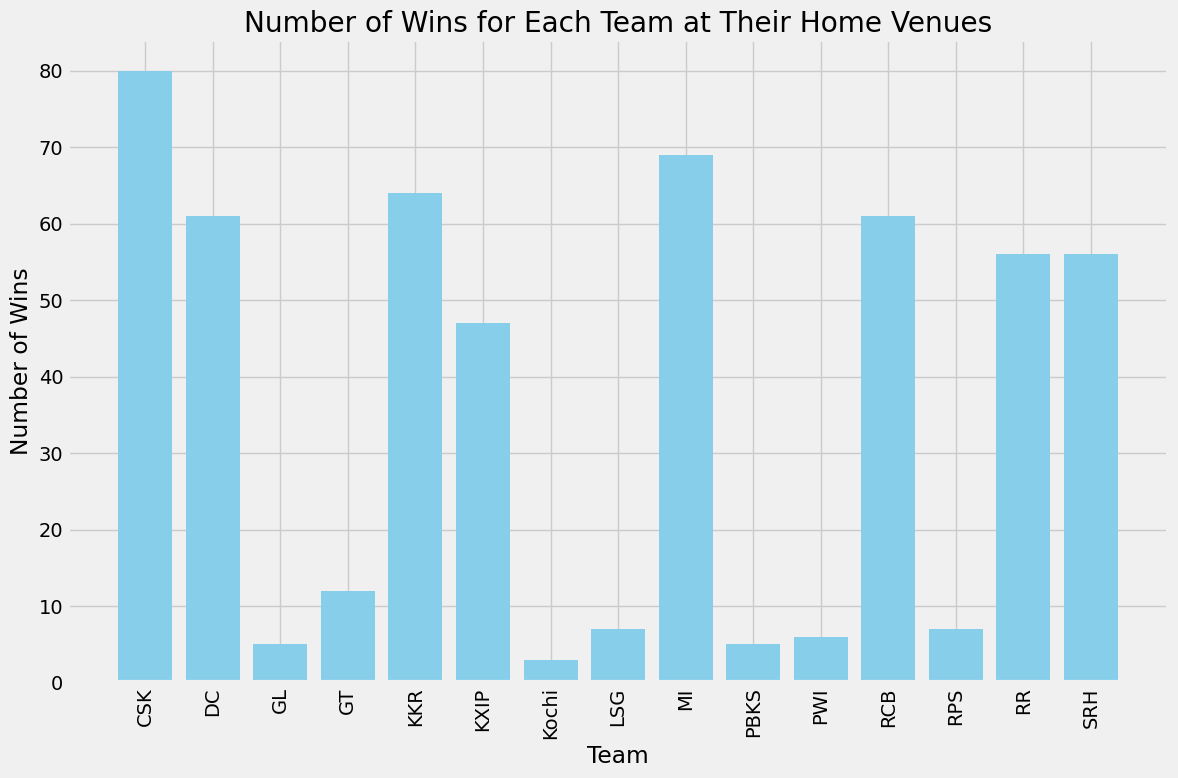

In [140]:
import matplotlib.pyplot as plt

# Filtering the Data for home wins
home_wins = summary_data[summary_data['winner'] == summary_data['home_team']]

# Grouping by home team and count the number of wins
team_wins = home_wins.groupby('home_team').size().reset_index(name='wins')

# Plotting
plt.figure(figsize=(12, 8))
plt.bar(team_wins['home_team'], team_wins['wins'], color='skyblue')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.title('Number of Wins for Each Team at Their Home Venues')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


<ipython-input-141-965c0b198a92>:4: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.countplot(x='season', hue='decision', data=summary_data,palette=color_palette,saturation=1)


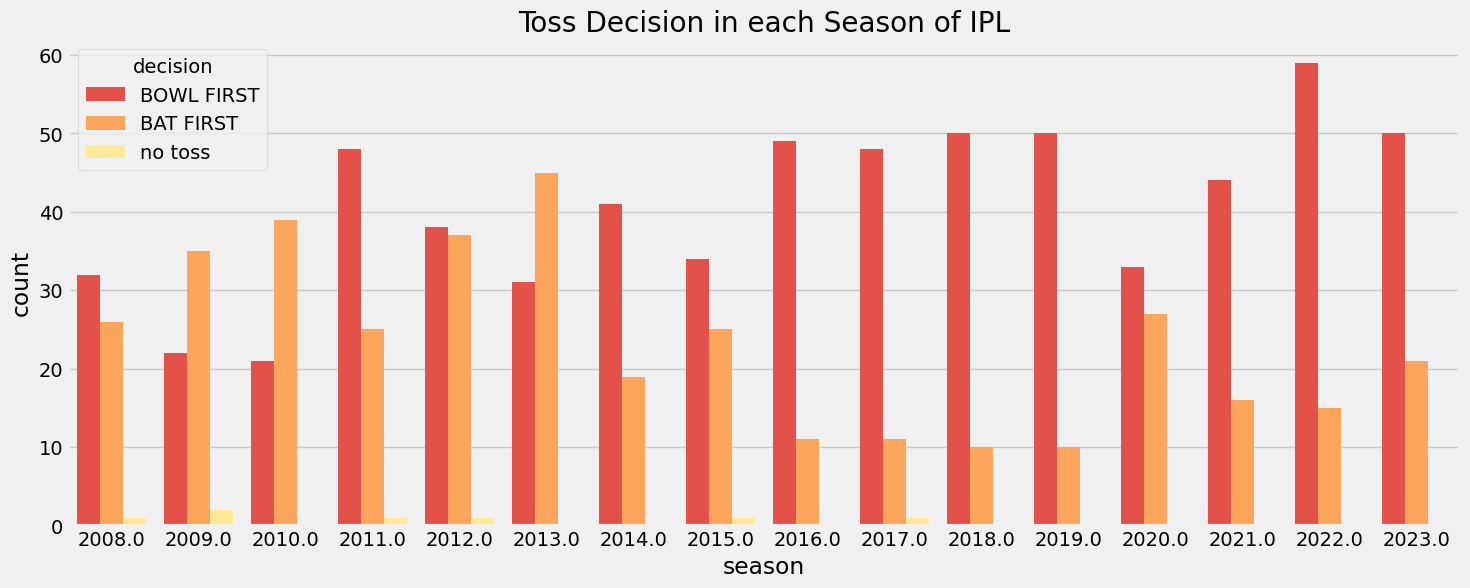

In [141]:
import seaborn as sns
plt.figure(figsize=(16,6))
color_palette = sns.color_palette("Spectral")
sns.countplot(x='season', hue='decision', data=summary_data,palette=color_palette,saturation=1)
plt.title('Toss Decision in each Season of IPL');

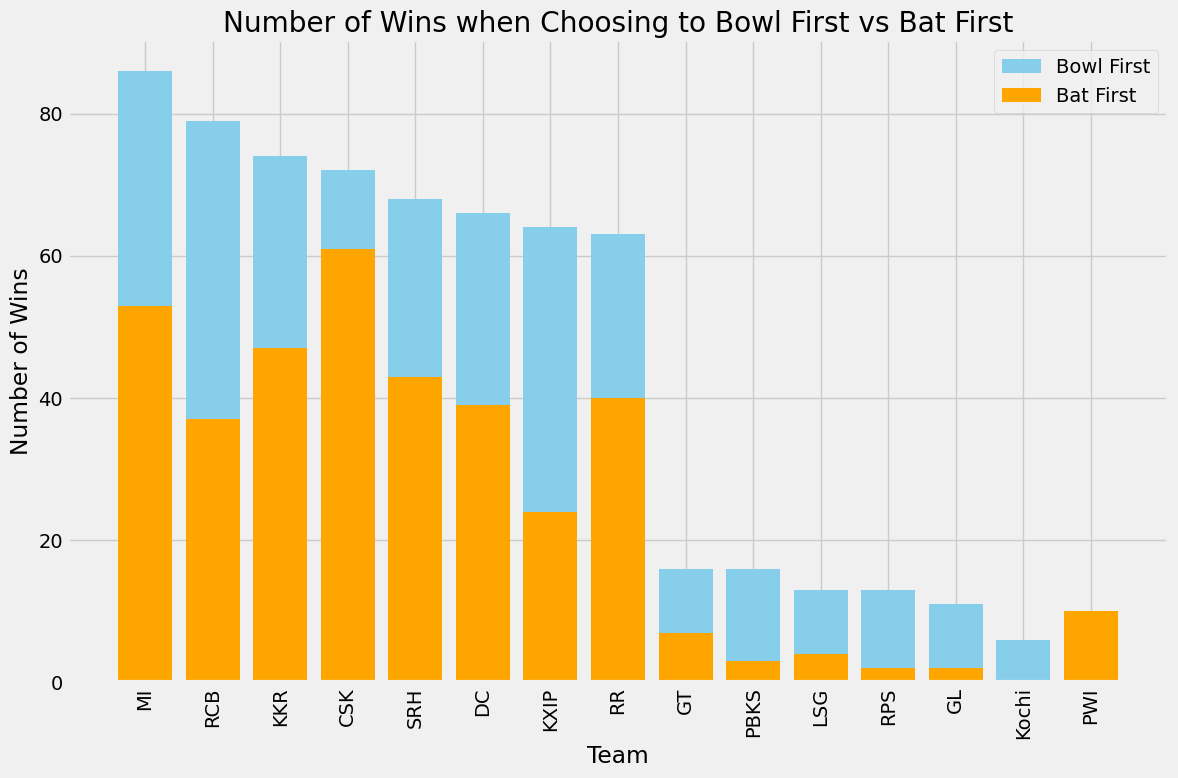

In [142]:
bowl_first_matches = summary_data[summary_data['decision'] == 'BOWL FIRST']

bowl_first_wins = bowl_first_matches['winner'].value_counts()

bat_first_matches =  summary_data[summary_data['decision'] == 'BAT FIRST']

bat_first_wins = bat_first_matches['winner'].value_counts()
plt.figure(figsize=(12, 8))
plt.bar(bowl_first_wins.index, bowl_first_wins.values, color='skyblue', label='Bowl First')
plt.bar(bat_first_wins.index, bat_first_wins.values, color='orange', label='Bat First')

plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.title('Number of Wins when Choosing to Bowl First vs Bat First')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [143]:
summary_feats = summary_data[['id','home_team','away_team','toss_won','decision','winner','venue_id','home_runs','away_runs','home_wickets','away_wickets']].copy()
pt_feats = points_table[['season','short_name','matcheswon','nrr']].copy()
final_feats = pd.merge(summary_feats,pt_feats, left_on='home_team', right_on='short_name', how='right')



In [144]:
final_feats.head()

,id,home_team,away_team,toss_won,decision,winner,venue_id,home_runs,away_runs,home_wickets,away_wickets,season,short_name,matcheswon,nrr
0,1359475,GT,CSK,GT,BOWL FIRST,GT,57851,182.0,178.0,5.0,7.0,2023.0,GT,10,0.809
1,1359487,GT,KKR,GT,BAT FIRST,KKR,57851,204.0,207.0,4.0,7.0,2023.0,GT,10,0.809
2,1359497,GT,RR,RR,BOWL FIRST,RR,57851,177.0,179.0,7.0,7.0,2023.0,GT,10,0.809
3,1359509,GT,MI,MI,BOWL FIRST,GT,57851,207.0,152.0,6.0,9.0,2023.0,GT,10,0.809
4,1359518,GT,DC,DC,BAT FIRST,DC,57851,125.0,130.0,6.0,8.0,2023.0,GT,10,0.809


In [145]:
final_feats.shape

(14466, 15)

In [146]:
final_feats.isnull().sum()

id                0
home_team         0
away_team         0
toss_won         34
decision         34
winner           16
venue_id          0
home_runs       160
away_runs       192
home_wickets    160
away_wickets    192
season            0
short_name        0
matcheswon        0
nrr               0
dtype: int64

In [147]:
final_feats.dropna(inplace=True)

In [148]:
final_feats.shape

(14274, 15)

In [149]:
final_feats.isnull().sum()

id              0
home_team       0
away_team       0
toss_won        0
decision        0
winner          0
venue_id        0
home_runs       0
away_runs       0
home_wickets    0
away_wickets    0
season          0
short_name      0
matcheswon      0
nrr             0
dtype: int64

In [150]:
#Preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [151]:
label_encoder = LabelEncoder()

# Encode each categorical column
for column in final_feats.columns:
    if final_feats[column].dtype == 'object':
        final_feats[column] = label_encoder.fit_transform(final_feats[column])

In [152]:
final_feats.head()

,id,home_team,away_team,toss_won,decision,winner,venue_id,home_runs,away_runs,home_wickets,away_wickets,season,short_name,matcheswon,nrr
0,1359475,3,0,3,1,3,57851,182.0,178.0,5.0,7.0,2023.0,3,10,0.809
1,1359487,3,4,3,0,4,57851,204.0,207.0,4.0,7.0,2023.0,3,10,0.809
2,1359497,3,13,12,1,13,57851,177.0,179.0,7.0,7.0,2023.0,3,10,0.809
3,1359509,3,8,8,1,3,57851,207.0,152.0,6.0,9.0,2023.0,3,10,0.809
4,1359518,3,1,1,0,1,57851,125.0,130.0,6.0,8.0,2023.0,3,10,0.809


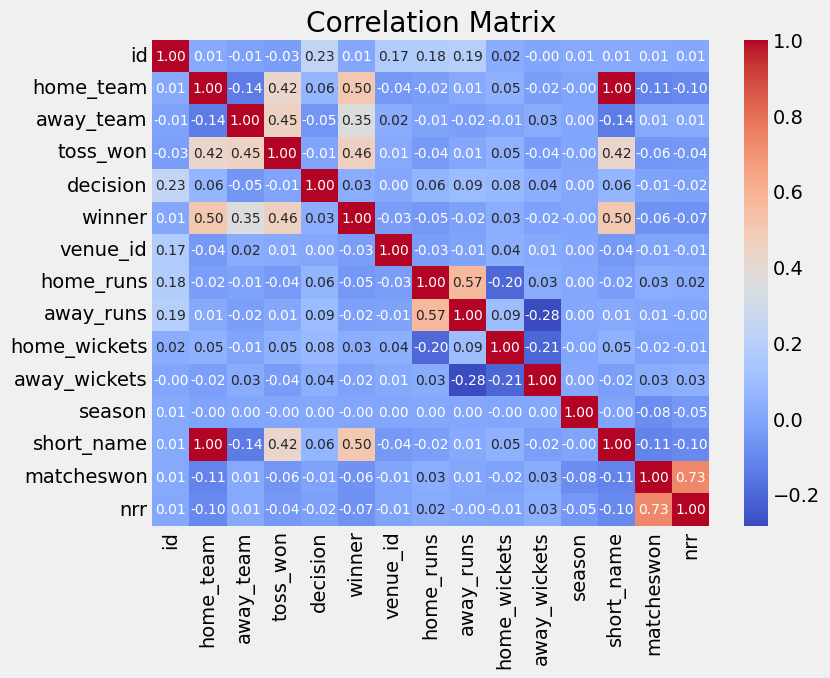

In [153]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr = final_feats.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()


In [154]:
print(batting_data.dtypes)

season             float64
match_id             int64
match_name          object
home_team           object
away_team           object
venue               object
city                object
country             object
current_innings     object
innings_id           int64
name                object
fullName            object
runs               float64
ballsFaced         float64
minutes             object
fours              float64
sixes              float64
strikeRate          object
captain               bool
isNotOut            object
runningScore        object
runningOver        float64
shortText           object
commentary          object
link               float64
dtype: object


In [155]:
batting_data['strikeRate'].dtype

dtype('O')

In [156]:
batting_data['strikeRate'].isnull().sum()

6

In [157]:
batting_data.shape

(15720, 25)

In [158]:
batting_data['strikeRate'] = pd.to_numeric(batting_data['strikeRate'],errors='coerce')

In [159]:
average_strike_rate_team = batting_data.groupby(['match_id', 'current_innings'])['strikeRate'].mean().reset_index()
print(average_strike_rate_team)

      match_id current_innings  strikeRate
0       335982             KKR  133.284000
1       335982             RCB   61.246364
2       335983             CSK  168.012857
3       335983            KXIP  144.255000
4       335984              DC  184.300000
...        ...             ...         ...
2040   1370351              MI  116.137778
2041   1370352              GT  186.316000
2042   1370352              MI  108.096364
2043   1370353             CSK  171.152857
2044   1370353              GT  142.542000

[2045 rows x 3 columns]


In [160]:
for column in average_strike_rate_team.columns:
    if average_strike_rate_team[column].dtype == 'object':
        average_strike_rate_team[column] = label_encoder.fit_transform(average_strike_rate_team[column])

In [161]:
average_strike_rate_team.head()

,match_id,current_innings,strikeRate
0,335982,4,133.284000
1,335982,11,61.246364
2,335983,0,168.012857
3,335983,5,144.255000
4,335984,1,184.300000


In [162]:
final_feats1 = pd.merge(final_feats,average_strike_rate_team,left_on='id', right_on='match_id', how='left')
final_feats1.head()

,id,home_team,away_team,toss_won,decision,winner,venue_id,home_runs,away_runs,home_wickets,away_wickets,season,short_name,matcheswon,nrr,match_id,current_innings,strikeRate
0,1359475,3,0,3,1,3,57851,182.0,178.0,5.0,7.0,2023.0,3,10,0.809,1359475,0,104.610000
1,1359475,3,0,3,1,3,57851,182.0,178.0,5.0,7.0,2023.0,3,10,0.809,1359475,3,157.488571
2,1359487,3,4,3,0,4,57851,204.0,207.0,4.0,7.0,2023.0,3,10,0.809,1359487,3,144.905000
3,1359487,3,4,3,0,4,57851,204.0,207.0,4.0,7.0,2023.0,3,10,0.809,1359487,4,102.730000
4,1359497,3,13,12,1,13,57851,177.0,179.0,7.0,7.0,2023.0,3,10,0.809,1359497,3,134.915000


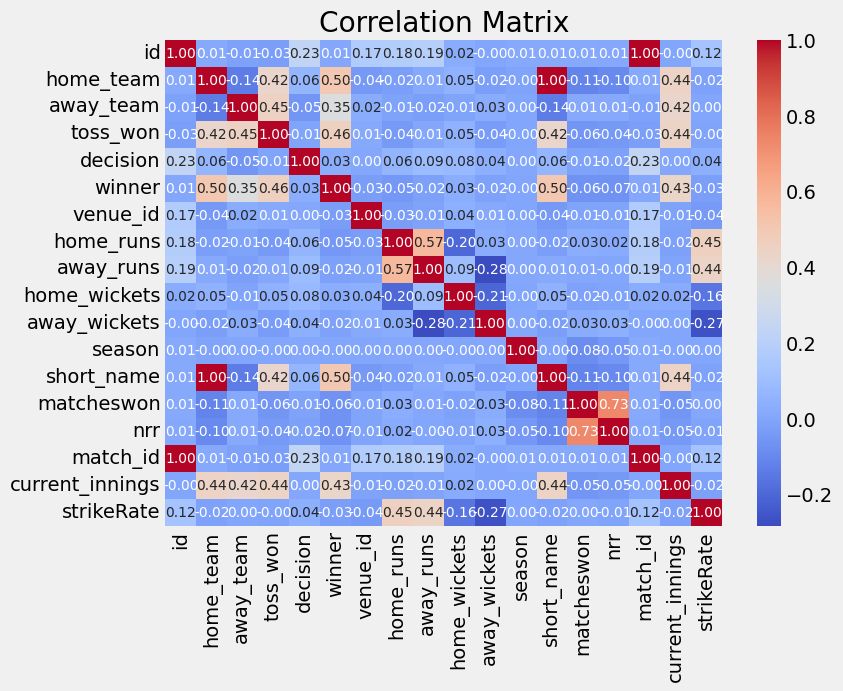

In [163]:
corr = final_feats1.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

In [164]:
bowling_data['economyRate'].dtype

dtype('O')

In [165]:
bowling_data['economyRate'] = pd.to_numeric(bowling_data['economyRate'],errors='coerce')

In [166]:
team_economy_rate = bowling_data.groupby('match_id')['economyRate'].mean()

print(team_economy_rate)

match_id
335982      9.160909
335983     11.596667
335984      7.711818
335985      8.175833
335986      5.864167
             ...    
1359544    10.235455
1370350     8.100000
1370351     7.743333
1370352    10.313333
1370353    11.270909
Name: economyRate, Length: 1024, dtype: float64


In [167]:
team_economic_rate = bowling_data.groupby(['match_id', 'bowling_team'])['economyRate'].mean().reset_index()
print(team_economic_rate)

      match_id bowling_team  economyRate
0       335982          KKR     5.422000
1       335982          RCB    12.276667
2       335983          CSK    10.050000
3       335983         KXIP    12.701429
4       335984           DC     6.250000
...        ...          ...          ...
2040   1370351           MI     6.986667
2041   1370352           GT     9.266667
2042   1370352           MI    11.360000
2043   1370353          CSK    10.600000
2044   1370353           GT    11.830000

[2045 rows x 3 columns]


In [168]:
for column in team_economic_rate.columns:
    if team_economic_rate[column].dtype == 'object':
        team_economic_rate[column] = label_encoder.fit_transform(team_economic_rate[column])

In [169]:
team_economic_rate.head()

,match_id,bowling_team,economyRate
0,335982,4,5.422000
1,335982,11,12.276667
2,335983,0,10.050000
3,335983,5,12.701429
4,335984,1,6.250000


In [170]:
final_feats2 = pd.merge(final_feats1,team_economic_rate,left_on='id', right_on='match_id', how='left')
final_feats2.head()

,id,home_team,away_team,toss_won,decision,winner,venue_id,home_runs,away_runs,home_wickets,away_wickets,season,short_name,matcheswon,nrr,match_id_x,current_innings,strikeRate,match_id_y,bowling_team,economyRate
0,1359475,3,0,3,1,3,57851,182.0,178.0,5.0,7.0,2023.0,3,10,0.809,1359475,0,104.610000,1359475,0,9.310000
1,1359475,3,0,3,1,3,57851,182.0,178.0,5.0,7.0,2023.0,3,10,0.809,1359475,0,104.610000,1359475,3,9.263333
2,1359475,3,0,3,1,3,57851,182.0,178.0,5.0,7.0,2023.0,3,10,0.809,1359475,3,157.488571,1359475,0,9.310000
3,1359475,3,0,3,1,3,57851,182.0,178.0,5.0,7.0,2023.0,3,10,0.809,1359475,3,157.488571,1359475,3,9.263333
4,1359487,3,4,3,0,4,57851,204.0,207.0,4.0,7.0,2023.0,3,10,0.809,1359487,3,144.905000,1359487,3,10.300000


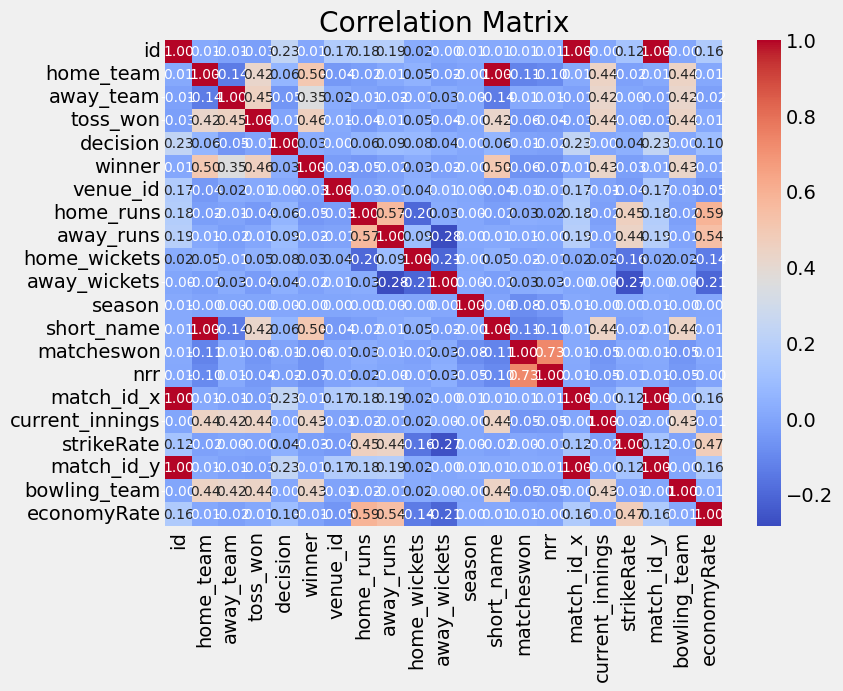

In [171]:
corr = final_feats2.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

In [172]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = final_feats2[['home_team','away_team','venue_id','toss_won','decision','nrr']]
y = final_feats2['winner']

# Standard scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Fitting the model
rf_classifier.fit(X_train, y_train)

# Predicting the test set results
y_pred = rf_classifier.predict(X_test)

# Evaluating the model
accuracy = (y_pred == y_test).mean()
print(f"Accuracy: {accuracy}")

Accuracy: 0.8205779334500876


In [173]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

xgb_classifier = XGBClassifier()

# Fitting the model
xgb_classifier.fit(X_train, y_train)

# Predicting the test set results
y_pred = xgb_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.8253940455341506


In [174]:
final_feats2.head(200)

,id,home_team,away_team,toss_won,decision,winner,venue_id,home_runs,away_runs,home_wickets,away_wickets,season,short_name,matcheswon,nrr,match_id_x,current_innings,strikeRate,match_id_y,bowling_team,economyRate
0,1359475,3,0,3,1,3,57851,182.0,178.0,5.0,7.0,2023.0,3,10,0.809,1359475,0,104.610000,1359475,0,9.310000
1,1359475,3,0,3,1,3,57851,182.0,178.0,5.0,7.0,2023.0,3,10,0.809,1359475,0,104.610000,1359475,3,9.263333
2,1359475,3,0,3,1,3,57851,182.0,178.0,5.0,7.0,2023.0,3,10,0.809,1359475,3,157.488571,1359475,0,9.310000
3,1359475,3,0,3,1,3,57851,182.0,178.0,5.0,7.0,2023.0,3,10,0.809,1359475,3,157.488571,1359475,3,9.263333
4,1359487,3,4,3,0,4,57851,204.0,207.0,4.0,7.0,2023.0,3,10,0.809,1359487,3,144.905000,1359487,3,10.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1175356,0,11,0,1,0,58008,71.0,70.0,3.0,10.0,2023.0,0,8,0.652,1175356,11,50.181818,1175356,11,3.930000
196,1175367,0,13,12,1,0,58008,175.0,167.0,5.0,8.0,2023.0,0,8,0.652,1175367,0,155.730000,1175367,0,8.916667
197,1175367,0,13,12,1,0,58008,175.0,167.0,5.0,8.0,2023.0,0,8,0.652,1175367,0,155.730000,1175367,13,8.526667
198,1175367,0,13,12,1,0,58008,175.0,167.0,5.0,8.0,2023.0,0,8,0.652,1175367,13,103.237778,1175367,0,8.916667


In [175]:
input_data = {
    'home_team': 4,
    'away_team': 1,
    'venue_id': 57980,
    'toss_won': 4,
    'decision': 0,
    'nrr': 2.518
}

input_features = scaler.transform(pd.DataFrame(input_data, index=[0]))

predicted_winner = rf_classifier.predict(input_features)[0]

predicted_winner_team = label_encoder.inverse_transform([predicted_winner])[0]
print("Predicted Winner:", predicted_winner_team)

Predicted Winner: KKR


In [176]:
input_data = {
    'home_team': 4,
    'away_team': 1,
    'venue_id': 57980,
    'toss_won': 4,
    'decision': 0,
    'nrr': 2.518
}

input_features = scaler.transform(pd.DataFrame(input_data, index=[0]))

predicted_winner = xgb_classifier.predict(input_features)[0]

predicted_winner_team = label_encoder.inverse_transform([predicted_winner])[0]
print("Predicted Winner:", predicted_winner_team)

Predicted Winner: KKR


In [177]:
original_values_encoded = label_encoder.classes_

print("Original values encoded for each team:")
for encoded_value, team in enumerate(original_values_encoded):
    print(f"{team}: {encoded_value}")

Original values encoded for each team:
CSK: 0
DC: 1
GL: 2
GT: 3
KKR: 4
KXIP: 5
Kochi: 6
LSG: 7
MI: 8
PBKS: 9
PWI: 10
RCB: 11
RPS: 12
RR: 13
SRH: 14


In [178]:
distinct_venues = summary_data[['venue_name', 'venue_id']].drop_duplicates()

# Print distinct list of venues with their respective IDs
print(distinct_venues)

                                            venue_name  venue_id
0             Narendra Modi Stadium, Motera, Ahmedabad     57851
1    Punjab Cricket Association IS Bindra Stadium, ...     57991
2    Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...   1070094
3    Rajiv Gandhi International Stadium, Uppal, Hyd...     58142
4                     M.Chinnaswamy Stadium, Bengaluru     57897
5             MA Chidambaram Stadium, Chepauk, Chennai     58008
6                          Arun Jaitley Stadium, Delhi     58040
7                  Barsapara Cricket Stadium, Guwahati    680295
8                                Eden Gardens, Kolkata     57980
11                            Wankhede Stadium, Mumbai     58324
25                      Sawai Mansingh Stadium, Jaipur     58162
63   Himachal Pradesh Cricket Association Stadium, ...     58056
75                           Brabourne Stadium, Mumbai     58317
76             Dr DY Patil Sports Academy, Navi Mumbai    343050
78       Maharashtra Cric

In [179]:
import pandas as pd

def predict_cricket_winner(home_team, away_team, venue_id, toss_won_team, decision, nrr):
    # Map team names to numerical labels using label encoder
    home_team_id = label_encoder.transform([home_team])[0]
    away_team_id = label_encoder.transform([away_team])[0]
    toss_won = label_encoder.transform([toss_won_team])[0]
    decision = 0 if decision.lower() == 'bat' else 1

    input_data = {
        'home_team': home_team_id,
        'away_team': away_team_id,
        'venue_id': venue_id,
        'toss_won': toss_won,
        'decision': decision,
        'nrr': nrr
    }

    # Transform input data using the scaler
    input_features = scaler.transform(pd.DataFrame(input_data, index=[0]))

    # Predict the winner
    predicted_winner = xgb_classifier.predict(input_features)[0]

    # Convert the predicted winner index back to team name using label encoder
    predicted_winner_team = label_encoder.inverse_transform([predicted_winner])[0]

    return predicted_winner_team


In [180]:
# Example usage:
home_team = input("Enter home team name: ")
away_team = input("Enter away team name: ")
venue_id = int(input("Enter venue ID: "))
toss_won_team = input("Enter toss won team name: ")
decision = input("Enter decision (bat or bowl): ")
nrr = input("Enter net run rate: ")

predicted_winner = predict_cricket_winner(home_team, away_team, venue_id, toss_won_team, decision, float(nrr))
print("Predicted Winner:", predicted_winner)


Enter home team name: PBKS
Enter away team name: GT
Enter venue ID: 57897
Enter toss won team name: PBKS
Enter decision (bat or bowl): bat
Enter net run rate: 0.734
Predicted Winner: GT


In [181]:
from sklearn.metrics import accuracy_score

#Test data
test_data = {
    'home_team': ['CSK', 'KKR', 'MI', 'RCB', 'DC'],
    'away_team': ['RCB', 'SRH', 'RR', 'KKR', 'SRH'],
    'venue_id': [58008, 57980, 58324, 57897, 58040],
    'toss_won_team': ['RCB', 'SRH', 'RR', 'KKR', 'SRH'],
    'decision': ['bat', 'bowl', 'bowl', 'bowl', 'bat'],
    'nrr': [0.8, 2.518, -1.423, -0.876, -1.347],
    'actual_winner': ['CSK', 'KKR', 'RR', 'KKR', 'SRH']
}

# Create test dataframe
test_df = pd.DataFrame(test_data)

# Apply the model to make predictions
test_df['predicted_winner'] = test_df.apply(lambda row: predict_cricket_winner(row['home_team'], row['away_team'], row['venue_id'], row['toss_won_team'], row['decision'], row['nrr']), axis=1)

# Calculate accuracy
accuracy = accuracy_score(test_df['actual_winner'], test_df['predicted_winner'])

print("Accuracy:", accuracy)


Accuracy: 0.8
